# Loading and Consolidating Data
First, let's load the zip file, unzip it and get the datasets in.

In [52]:
# Unzip the file
import zipfile
import os

In [53]:
zip_path = r"C:\Users\palad\Downloads\data.zip"
extract_dir = r"C:\Users\palad\Downloads\OPMFinalWeek"


In [54]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files to verify
print(os.listdir(extract_dir))

['data', '__MACOSX']


In [55]:
import pandas as pd
import os

# Path to the folder containing the CSV files
folder_path = r"C:\Users\palad\Downloads\OPMFinalWeek\data"  # Update this path if necessary (use your folder location)


In [56]:
# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Loop through each file to inspect its columns and the first few rows
for file in csv_files:
    print(f"Inspecting file: {file}")
    file_path = os.path.join(folder_path, file)

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Print column names and a sample of the data
    print("Columns:", df.columns)
    print(df.head(), "\n")


Inspecting file: Beans (dry).csv
Columns: Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')
   adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  cm_id  \
0      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
1      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
2      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
3      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
4      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   

       cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Beans (dry)      77      RWF     15  Retail      5      KG        11   
1  Beans (dry)      77      RWF     15  Retail      5      KG        12   
2  Be

Having loooked at all the tables, all that we need are months, years, and price columns with the rest else to be discarded.

In [57]:
# Initialize an empty dictionary to store cleaned and consolidated DataFrames
consolidated_dataframes = {}

# Process each CSV file
for file in csv_files:
    print(f"Processing file: {file}")
    file_path = os.path.join(folder_path, file)

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Step 1: Keep only the relevant columns
    df = df[['mp_year', 'mp_month', 'mp_price']]

    # Step 2: Group by 'mp_year' and 'mp_month', and aggregate 'mp_price'
    df = df.groupby(['mp_year', 'mp_month'], as_index=False).agg({'mp_price': 'mean'})

    # Step 3: Save the cleaned and consolidated DataFrame to the dictionary
    consolidated_dataframes[file.replace('.csv', '').strip()] = df

    # Save each cleaned DataFrame to a new CSV file (optional)
    output_path = os.path.join(folder_path, f"cleaned_{file}")
    df.to_csv(output_path, index=False)

    # Print a sample of the consolidated DataFrame
    print(f"Consolidated DataFrame for {file}:")
    print(df.head(), "\n")


Processing file: Beans (dry).csv
Consolidated DataFrame for Beans (dry).csv:
   mp_year  mp_month    mp_price
0     2008         1  272.348485
1     2008         2  257.045455
2     2008         3  272.500000
3     2008         4  282.159091
4     2008         5  284.015152 

Processing file: Cassava.csv
Consolidated DataFrame for Cassava.csv:
   mp_year  mp_month    mp_price
0     2008         1  138.194444
1     2008         2  139.600000
2     2008         3  147.916667
3     2008         4  168.958333
4     2008         5  152.395833 

Processing file: Chili (red).csv
Consolidated DataFrame for Chili (red).csv:
   mp_year  mp_month     mp_price
0     2012         1  1006.194420
1     2012         2  1241.099038
2     2012         3  1481.288732
3     2012         4  1498.898312
4     2012         5  1057.085829 

Processing file: Maize.csv
Consolidated DataFrame for Maize.csv:
   mp_year  mp_month    mp_price
0     2008         1  176.174242
1     2008         2  157.460938
2     2

In [58]:
# Check rows and columns for each cleaned DataFrame
for good, df in consolidated_dataframes.items():
    print(f"{good}: {df.shape[0]} rows, {df.shape[1]} columns")


Beans (dry): 96 rows, 3 columns
Cassava: 96 rows, 3 columns
Chili (red): 38 rows, 3 columns
Maize: 96 rows, 3 columns
Oranges (big size): 38 rows, 3 columns
Peas (fresh): 60 rows, 3 columns
Potatoes (Irish): 96 rows, 3 columns
Sorghum: 96 rows, 3 columns
Tomatoes: 38 rows, 3 columns


So here is the important step- we have to combine the year and months into a single date column and then aggregate the monthly prices as per the requirements to forecasting monthly price data. At last, rename the price column into the name of the good so that when we consolidate all the goods into a single dataset everything looks appropriate and clean.

In [59]:
# Update each cleaned DataFrame to include a 'Date' column
for good, df in consolidated_dataframes.items():
    print(f"Processing {good}...")

    # Combine 'mp_year' and 'mp_month' into a 'Date' column
    df['Date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str) + '-01')

    # Drop the now-redundant 'mp_year' and 'mp_month' columns
    df.drop(columns=['mp_year', 'mp_month'], inplace=True)

    # Update the DataFrame in the dictionary
    consolidated_dataframes[good] = df

    # Print a sample of the updated DataFrame
    print(f"Updated DataFrame for {good}:")
    print(df.head(), "\n")


Processing Beans (dry)...
Updated DataFrame for Beans (dry):
     mp_price       Date
0  272.348485 2008-01-01
1  257.045455 2008-02-01
2  272.500000 2008-03-01
3  282.159091 2008-04-01
4  284.015152 2008-05-01 

Processing Cassava...
Updated DataFrame for Cassava:
     mp_price       Date
0  138.194444 2008-01-01
1  139.600000 2008-02-01
2  147.916667 2008-03-01
3  168.958333 2008-04-01
4  152.395833 2008-05-01 

Processing Chili (red)...
Updated DataFrame for Chili (red):
      mp_price       Date
0  1006.194420 2012-01-01
1  1241.099038 2012-02-01
2  1481.288732 2012-03-01
3  1498.898312 2012-04-01
4  1057.085829 2012-05-01 

Processing Maize...
Updated DataFrame for Maize:
     mp_price       Date
0  176.174242 2008-01-01
1  157.460938 2008-02-01
2  145.820312 2008-03-01
3  160.898438 2008-04-01
4  158.040323 2008-05-01 

Processing Oranges (big size)...
Updated DataFrame for Oranges (big size):
     mp_price       Date
0  588.338306 2012-01-01
1  613.507134 2012-02-01
2  555.67820

In [60]:
# Rename 'mp_price' in each cleaned DataFrame to the first word of the file name
for file, df in consolidated_dataframes.items():
    # Extract the first word from the file name
    good_name = file.split()[0]  # Gets the first word before a space
    df.rename(columns={'mp_price': good_name}, inplace=True)

    # Update the dictionary with the renamed DataFrame
    consolidated_dataframes[file] = df

    # Print to confirm the renaming
    print(f"Renamed column for {file}: {good_name}")
    print(df.head(), "\n")


Renamed column for Beans (dry): Beans
        Beans       Date
0  272.348485 2008-01-01
1  257.045455 2008-02-01
2  272.500000 2008-03-01
3  282.159091 2008-04-01
4  284.015152 2008-05-01 

Renamed column for Cassava: Cassava
      Cassava       Date
0  138.194444 2008-01-01
1  139.600000 2008-02-01
2  147.916667 2008-03-01
3  168.958333 2008-04-01
4  152.395833 2008-05-01 

Renamed column for Chili (red): Chili
         Chili       Date
0  1006.194420 2012-01-01
1  1241.099038 2012-02-01
2  1481.288732 2012-03-01
3  1498.898312 2012-04-01
4  1057.085829 2012-05-01 

Renamed column for Maize: Maize
        Maize       Date
0  176.174242 2008-01-01
1  157.460938 2008-02-01
2  145.820312 2008-03-01
3  160.898438 2008-04-01
4  158.040323 2008-05-01 

Renamed column for Oranges (big size): Oranges
      Oranges       Date
0  588.338306 2012-01-01
1  613.507134 2012-02-01
2  555.678200 2012-03-01
3  478.481667 2012-04-01
4  412.980904 2012-05-01 

Renamed column for Peas (fresh): Peas
     

In [61]:
# Initialize the combined DataFrame
combined_df = None

# Loop through the cleaned DataFrames and merge them
for good, df in consolidated_dataframes.items():
    print(f"Merging {good} into the combined DataFrame...")

    if combined_df is None:
        # Start with the first DataFrame
        combined_df = df
    else:
        # Outer join on the 'Date' column
        combined_df = pd.merge(combined_df, df, on='Date', how='outer')

# Display the combined DataFrame
print("Combined DataFrame (Outer Join):")
print(combined_df.head())




Merging Beans (dry) into the combined DataFrame...
Merging Cassava into the combined DataFrame...
Merging Chili (red) into the combined DataFrame...
Merging Maize into the combined DataFrame...
Merging Oranges (big size) into the combined DataFrame...
Merging Peas (fresh) into the combined DataFrame...
Merging Potatoes (Irish) into the combined DataFrame...
Merging Sorghum into the combined DataFrame...
Merging Tomatoes into the combined DataFrame...
Combined DataFrame (Outer Join):
        Beans       Date     Cassava  Chili       Maize  Oranges  Peas  \
0  272.348485 2008-01-01  138.194444    NaN  176.174242      NaN   NaN   
1  257.045455 2008-02-01  139.600000    NaN  157.460938      NaN   NaN   
2  272.500000 2008-03-01  147.916667    NaN  145.820312      NaN   NaN   
3  282.159091 2008-04-01  168.958333    NaN  160.898438      NaN   NaN   
4  284.015152 2008-05-01  152.395833    NaN  158.040323      NaN   NaN   

     Potatoes     Sorghum  Tomatoes  
0   97.000000  178.554688    

In [62]:
# Display the number of rows and columns in the consolidated DataFrame
print(f"Number of rows: {combined_df.shape[0]}")
print(f"Number of columns: {combined_df.shape[1]}")


Number of rows: 96
Number of columns: 10


In [63]:
# Set 'Date' as the index
combined_df.set_index('Date', inplace=True)
print(combined_df)

                 Beans     Cassava        Chili       Maize     Oranges  \
Date                                                                      
2008-01-01  272.348485  138.194444          NaN  176.174242         NaN   
2008-02-01  257.045455  139.600000          NaN  157.460938         NaN   
2008-03-01  272.500000  147.916667          NaN  145.820312         NaN   
2008-04-01  282.159091  168.958333          NaN  160.898438         NaN   
2008-05-01  284.015152  152.395833          NaN  158.040323         NaN   
...                ...         ...          ...         ...         ...   
2015-08-01  388.856805  224.011566  1041.360229  239.779426  685.692580   
2015-09-01  405.965975  222.814049  1371.090149  251.107098  725.717308   
2015-10-01  418.106955  218.301943  1536.610702  248.519557  676.828331   
2015-11-01  448.042961  230.624419  1276.768582  276.936802  547.409525   
2015-12-01  466.655655  239.383332   917.367858  298.876240  543.392900   

                   Peas 

# EDA

## Data Overview

In [64]:
# 1. Display the shape of the DataFrame
print("DataFrame Shape (Rows, Columns):")
print(combined_df.shape)

# 2. List the column names and their respective data types
print("\nColumn Names and Data Types:")
print(combined_df.dtypes)

DataFrame Shape (Rows, Columns):
(96, 9)

Column Names and Data Types:
Beans       float64
Cassava     float64
Chili       float64
Maize       float64
Oranges     float64
Peas        float64
Potatoes    float64
Sorghum     float64
Tomatoes    float64
dtype: object


In [65]:
# 3. Verify the date range of the index
print("\nDate Range of the Index:")
print(f"Start Date: {combined_df.index.min()}")
print(f"End Date: {combined_df.index.max()}")


Date Range of the Index:
Start Date: 2008-01-01 00:00:00
End Date: 2015-12-01 00:00:00


In [66]:
# 4. Check if the date index is continuous
# Create a complete date range from start to end
full_date_range = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')

# Compare the generated date range with the DataFrame's index
missing_dates = full_date_range.difference(combined_df.index)

if missing_dates.empty:
    print("\nThe date index is continuous, with no missing months.")
else:
    print("\nThe following dates are missing from the index:")
    print(missing_dates)


The date index is continuous, with no missing months.


## Missing Values

In [67]:
# Calculate the total and percentage of missing values for each column
missing_values = combined_df.isnull().sum()
missing_percentage = (missing_values / len(combined_df)) * 100

# Summarize missing values into a DataFrame
missing_summary = pd.DataFrame({
    'Total Missing': missing_values,
    'Percentage Missing (%)': missing_percentage
}).sort_values(by='Percentage Missing (%)', ascending=False)

# Display the summary of missing values
print(missing_summary)


          Total Missing  Percentage Missing (%)
Chili                58               60.416667
Oranges              58               60.416667
Tomatoes             58               60.416667
Peas                 36               37.500000
Beans                 0                0.000000
Cassava               0                0.000000
Maize                 0                0.000000
Potatoes              0                0.000000
Sorghum               0                0.000000


The missing months as we see is the result of some goods having started in 2008, whereas some have their observations from 2012. So when we merged all the goods on date using the Outer Join, this resulted in those some of those NAN values, but nothing actually missing in the individual respective goods.

## Descriptive Statistics

In [68]:
# Generate descriptive statistics for each column
descriptive_stats = combined_df.describe().T[['min', 'mean', '50%', 'max', 'std']]

# Rename '50%' to 'median' for clarity
descriptive_stats.rename(columns={'50%': 'median'}, inplace=True)

# Display the descriptive statistics
descriptive_stats


,min,mean,median,max,std
Beans,219.697584,334.083819,327.908199,530.042987,64.789260
Cassava,130.102775,195.969790,204.739094,260.887844,35.205063
Chili,655.904309,1129.368683,1056.904008,1952.848602,306.620568
Maize,145.820312,227.949904,225.736949,335.986608,41.577013
Oranges,412.980904,583.524695,582.115439,726.086930,77.458279
Peas,553.885886,922.292466,875.390358,1499.938600,228.328475
Potatoes,97.000000,156.671755,150.377180,245.468424,35.260186
Sorghum,164.921875,275.130178,258.348848,388.809678,61.370135
Tomatoes,273.199820,376.446175,374.262788,469.490286,56.819252


As universal mostly, goods like potatoes are the cheapest and chilli are the most expensive.

## Time Series Visualizations

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

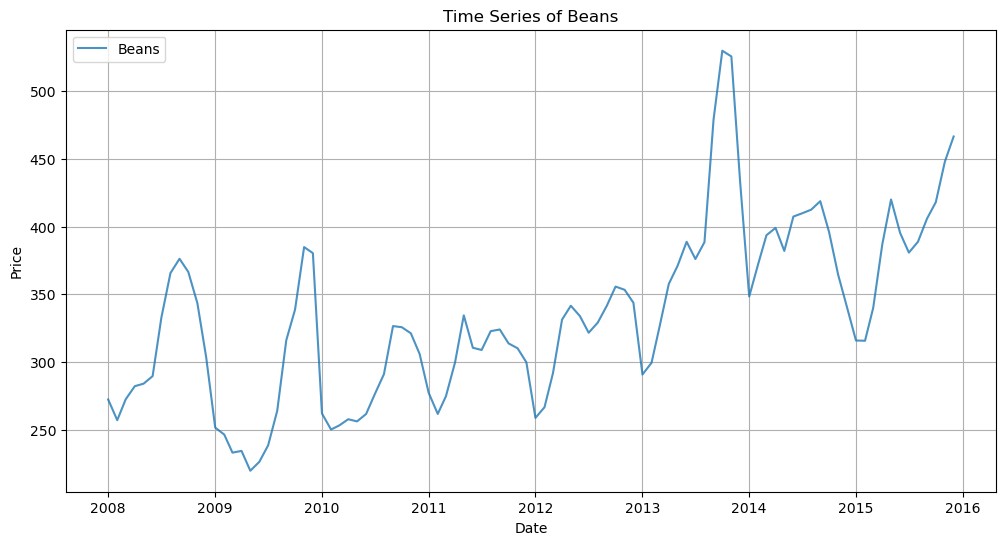

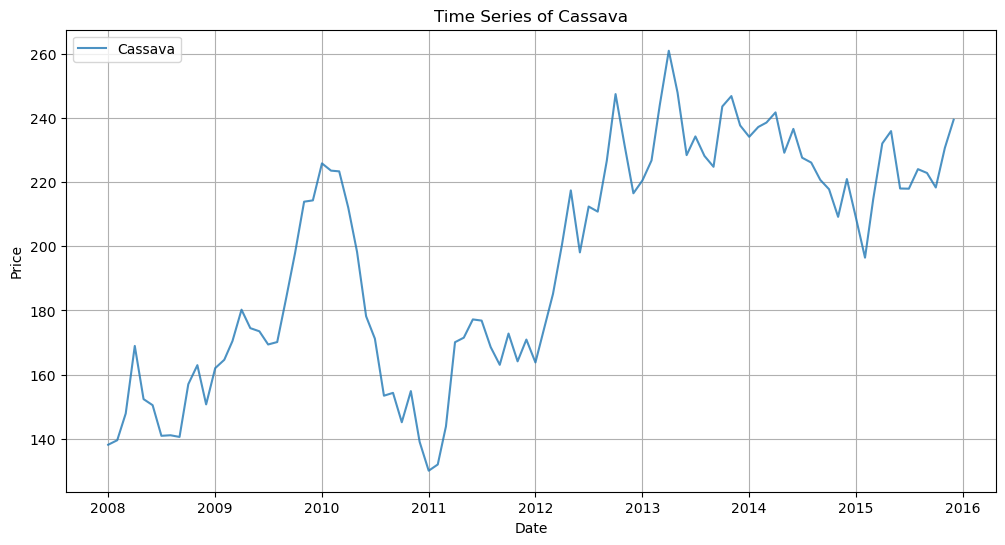

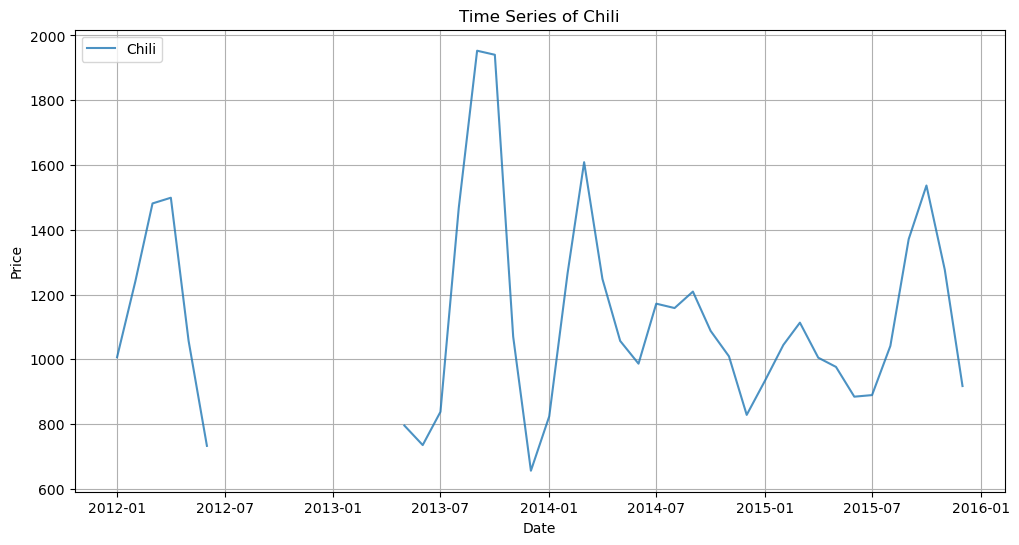

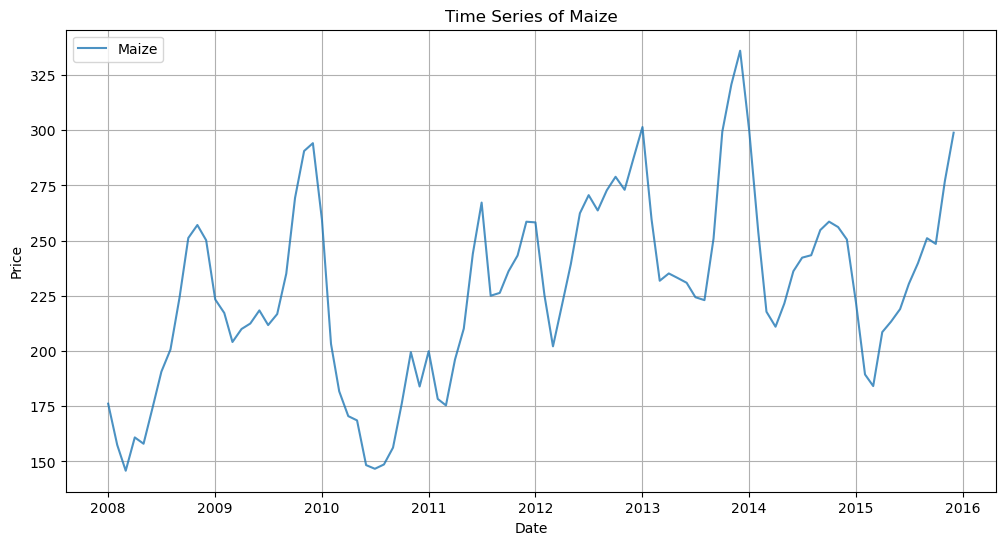

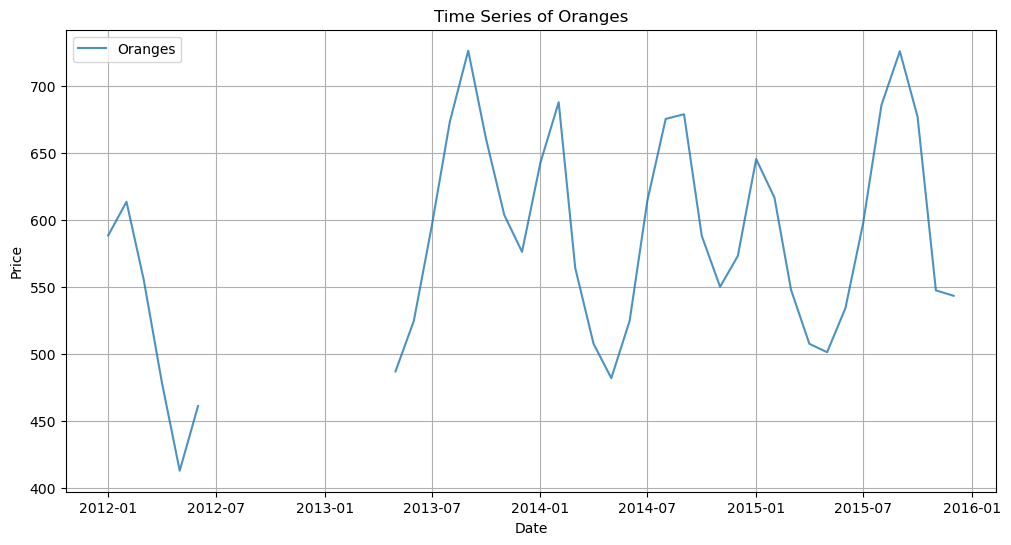

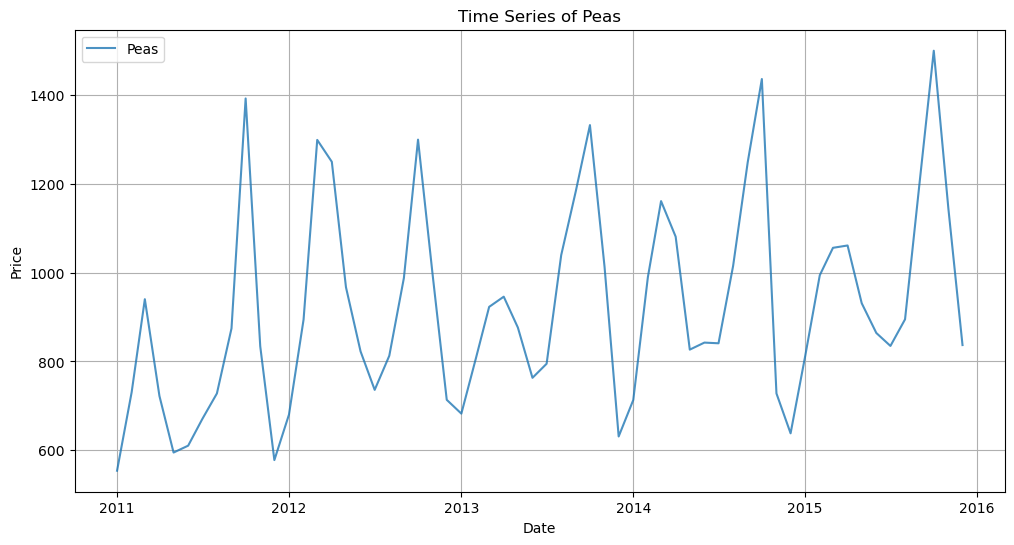

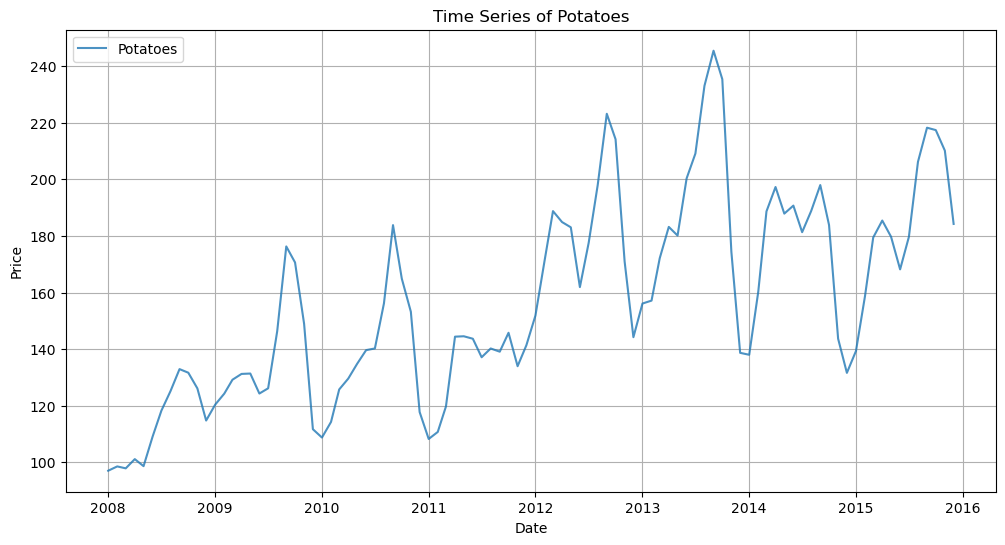

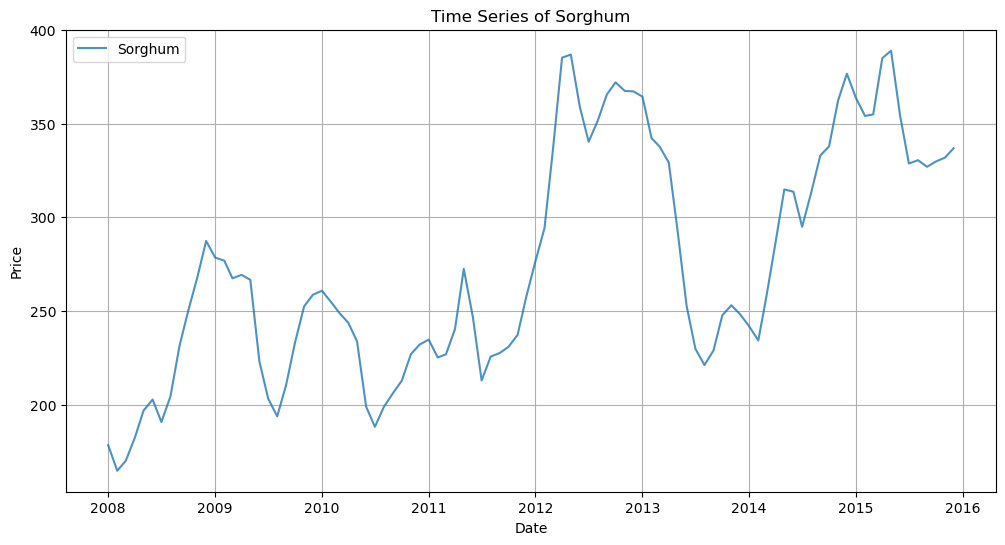

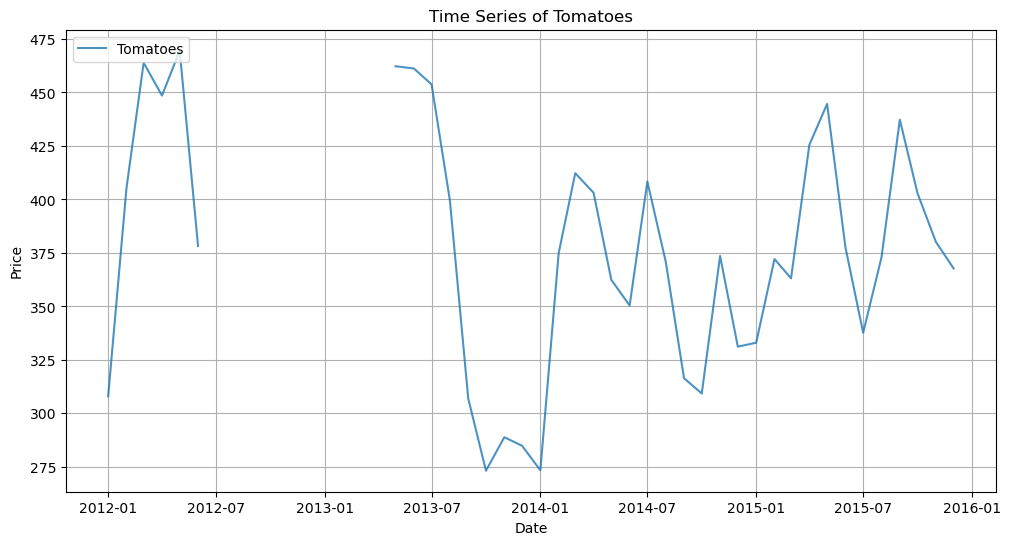

In [70]:
# Individual time series plots for each good
for good in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df.index, combined_df[good], label=good, alpha=0.8)
    plt.title(f'Time Series of {good}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


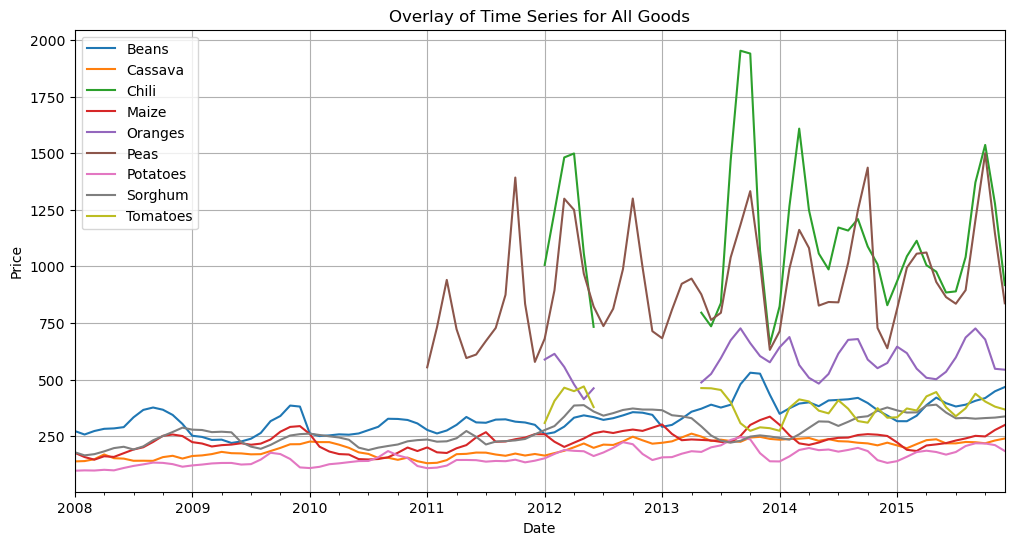

In [71]:
# Combined time series plot
combined_df.plot(figsize=(12, 6), title='Overlay of Time Series for All Goods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Goods like chilli and peas had high seasonality with peaks and troughs recurring, whereas cassava and potatoes are almost had no seasonality across timeframe observed.

#Handling Missing Values

In [72]:
# Identify columns with missing values and their total count
missing_columns = combined_df.isnull().sum()
missing_columns = missing_columns[missing_columns > 0]  # Filter only columns with missing values

# Display columns with missing values and their total count
print("Columns with Missing Values:")
print(missing_columns)


Columns with Missing Values:
Chili       58
Oranges     58
Peas        36
Tomatoes    58
dtype: int64


Oops, as opposes to our contrartary view, there are some missing values that are being filled in the below steps in some of the goods like beans etc. Below Linear interpolation is chosen because it estimates missing values based on trends in the data, making it suitable for time series where values change smoothly over time. It maintains continuity and avoids abrupt changes that forward or backward fill might introduce.

In [90]:
# Fill missing values using linear interpolation
combined_df.interpolate(method='linear', inplace=True)

# Verify if all missing values are filled
print("Missing values after interpolation:")
print(combined_df.isnull().sum())


Missing values after interpolation:
Beans                      0
Cassava                    0
Chili                     48
Maize                      0
Oranges                   48
Peas                      36
Potatoes                   0
Sorghum                    0
Tomatoes                  48
Tomatoes_SMA_3            50
Tomatoes_SMA_6            53
Tomatoes_SMA_3_shifted    51
Tomatoes_SMA_6_shifted    54
EMA_3                     49
EMA_6                     49
dtype: int64


The missing values above of chilli, organges, peas, tomatoes arent necessarily missing but observations not available during filled with NAN's when merged along with other datasets.

## Similarity between products

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Identify the pair of goods with the highest correlation value
highest_corr = correlation_matrix.unstack().sort_values(ascending=False)
highest_corr_pair = highest_corr[(highest_corr.index.get_level_values(0) != highest_corr.index.get_level_values(1))].idxmax()
highest_corr_value = highest_corr[(highest_corr.index.get_level_values(0) != highest_corr.index.get_level_values(1))].max()

print(f"Highest Correlation Pair: {highest_corr_pair} with a correlation of {highest_corr_value:.2f}")


Highest Correlation Pair: ('Beans', 'Potatoes') with a correlation of 0.68


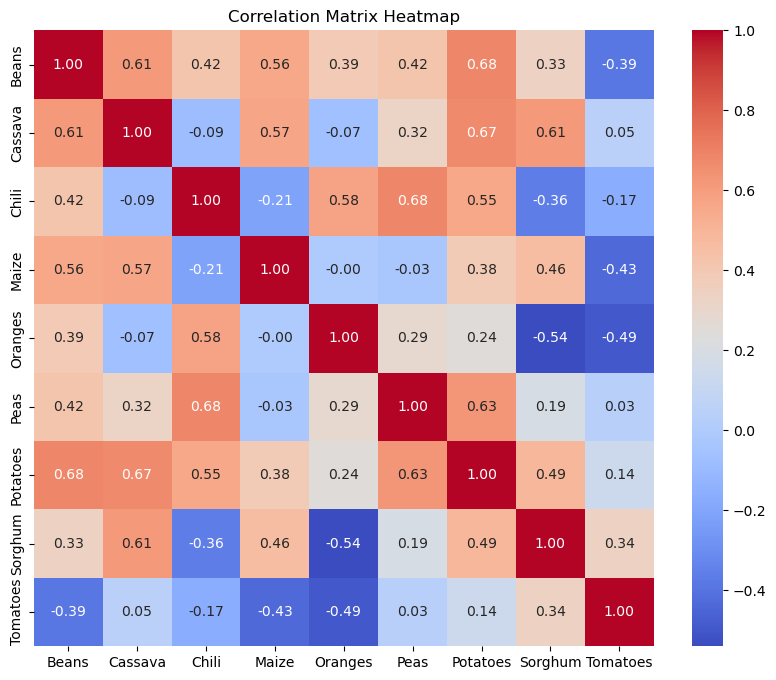

In [75]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation is meaningful as it measures the strength and direction of linear relationships between goods. High correlation indicates similar price trends, which can be useful for understanding market dynamics. for example, if we see in the above correlation matrix correlation between potatoes, beans, and peas can help us take necessary proactive steps when involved in the business like increasing the stock quantity to avoid losses if prices are about to peak and selling the stock at discounts when prices are about to drop etc.

## Forecasting for next 6 months

### Simple Moving Average
Lets calculate the smoothing average in a separate column and then shift it by 1 row as needed in python dataframes and finally try to predict the next 6 months.

In [76]:
# Calculate 3-Month SMA
combined_df['Tomatoes_SMA_3'] = combined_df['Tomatoes'].rolling(window=3).mean()

# Calculate 6-Month SMA
combined_df['Tomatoes_SMA_6'] = combined_df['Tomatoes'].rolling(window=6).mean()

# Shift the SMA to simulate forecasting for the next period
combined_df['Tomatoes_SMA_3_shifted'] = combined_df['Tomatoes_SMA_3'].shift(1)
combined_df['Tomatoes_SMA_6_shifted'] = combined_df['Tomatoes_SMA_6'].shift(1)

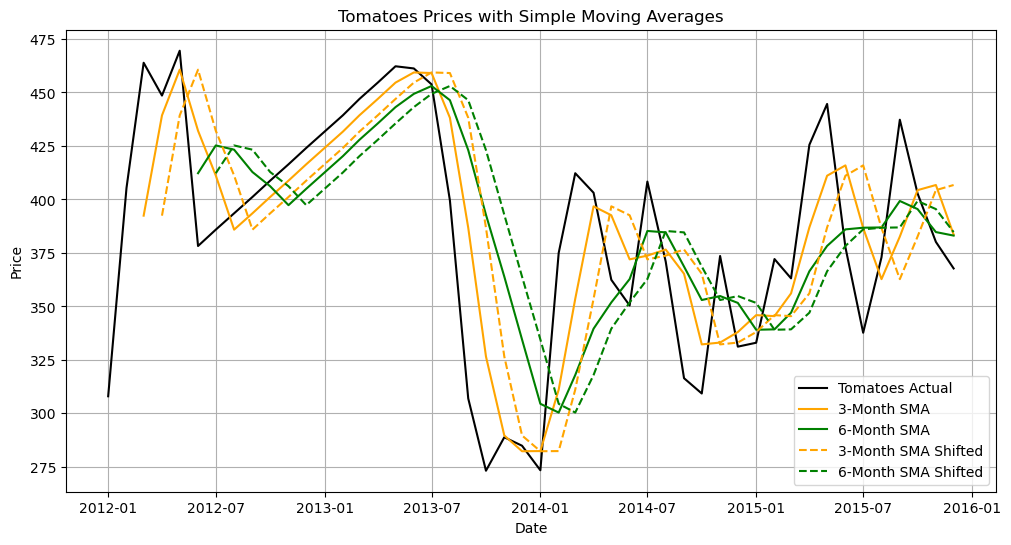

In [77]:
# Plot the SMAs along with actual data
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(combined_df['Tomatoes'], label='Tomatoes Actual', color='black')

# Plot SMAs
plt.plot(combined_df['Tomatoes_SMA_3'], label='3-Month SMA', color='orange')
plt.plot(combined_df['Tomatoes_SMA_6'], label='6-Month SMA', color='green')

# Plot shifted SMAs
plt.plot(combined_df['Tomatoes_SMA_3_shifted'], label='3-Month SMA Shifted', linestyle='--', color='orange')
plt.plot(combined_df['Tomatoes_SMA_6_shifted'], label='6-Month SMA Shifted', linestyle='--', color='green')

# Customize the plot
plt.title('Tomatoes Prices with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

We can see that as the window size is being increased from 3 months to 6 months the graph is getting more and more smoothed out which is actually the essenence and usefuless of these smoothing techniques.

In [78]:
# Create forecast dates
forecast_dates = pd.date_range(start=combined_df.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

# Forecast values using the last shifted values
forecast_sma_3 = combined_df['Tomatoes_SMA_3_shifted'].iloc[-1]
forecast_sma_6 = combined_df['Tomatoes_SMA_6_shifted'].iloc[-1]

# Combine forecasts into a DataFrame
forecast_sma_df = pd.DataFrame({
    'Date': forecast_dates,
    'SMA_3_Forecast': [forecast_sma_3] * 6,
    'SMA_6_Forecast': [forecast_sma_6] * 6
}).set_index('Date')


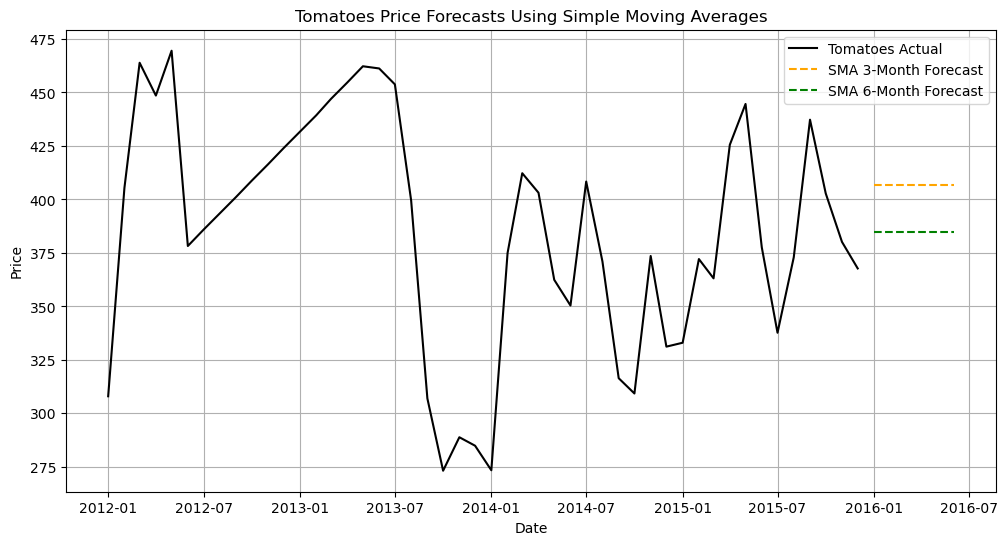

In [79]:
# Plot the forecasts along with the actual data
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(combined_df['Tomatoes'], label='Tomatoes Actual', color='black')

# Plot forecasts
plt.plot(forecast_sma_df.index, forecast_sma_df['SMA_3_Forecast'], label='SMA 3-Month Forecast', linestyle='--', color='orange')
plt.plot(forecast_sma_df.index, forecast_sma_df['SMA_6_Forecast'], label='SMA 6-Month Forecast', linestyle='--', color='green')

# Customize the plot
plt.title('Tomatoes Price Forecasts Using Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Well the forecast is almost plain straight which is the best I could form of with the knowledge and tools available at hand.

### Exponential Moving Average

In [80]:
# Calculate EMA for 3-month and 6-month windows
combined_df['EMA_3'] = combined_df['Tomatoes'].ewm(span=3, adjust=False).mean().shift(1)
combined_df['EMA_6'] = combined_df['Tomatoes'].ewm(span=6, adjust=False).mean().shift(1)

# Print the last few rows to check
print(combined_df[['Tomatoes', 'EMA_3', 'EMA_6']].tail())


              Tomatoes       EMA_3       EMA_6
Date                                          
2015-08-01  372.943626  367.834263  374.906792
2015-09-01  437.250974  370.388945  374.345887
2015-10-01  402.794936  403.819959  392.318769
2015-11-01  380.140961  403.307447  395.311960
2015-12-01  367.737436  391.724204  390.977389


In [81]:
# Forecast for the next 6 months
ema_3_forecast = [combined_df['EMA_3'].iloc[-1]] * 6
ema_6_forecast = [combined_df['EMA_6'].iloc[-1]] * 6

# Create a DataFrame for forecasted dates and prices
forecast_dates = pd.date_range(start=combined_df.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'EMA_3_Forecast': ema_3_forecast, 'EMA_6_Forecast': ema_6_forecast})
forecast_df.set_index('Date', inplace=True)

# Print the forecasted values
print(forecast_df)


            EMA_3_Forecast  EMA_6_Forecast
Date                                      
2016-01-31      391.724204      390.977389
2016-02-29      391.724204      390.977389
2016-03-31      391.724204      390.977389
2016-04-30      391.724204      390.977389
2016-05-31      391.724204      390.977389
2016-06-30      391.724204      390.977389


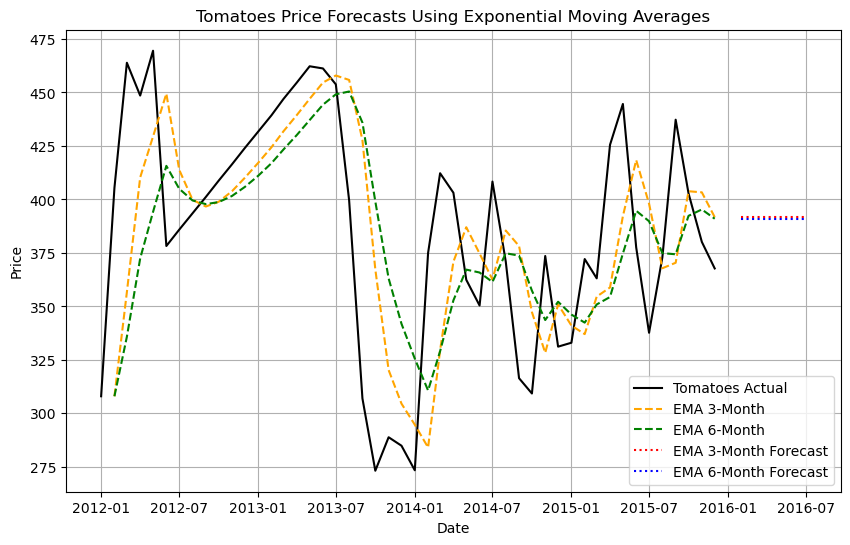

In [82]:
# Plot the original data, EMA, and forecasted values
plt.figure(figsize=(10, 6))

# Plot actual prices
plt.plot(combined_df.index, combined_df['Tomatoes'], label='Tomatoes Actual', color='black')

# Plot EMA
plt.plot(combined_df.index, combined_df['EMA_3'], label='EMA 3-Month', color='orange', linestyle='--')
plt.plot(combined_df.index, combined_df['EMA_6'], label='EMA 6-Month', color='green', linestyle='--')

# Plot forecasted values
plt.plot(forecast_df.index, forecast_df['EMA_3_Forecast'], label='EMA 3-Month Forecast', color='red', linestyle='dotted')
plt.plot(forecast_df.index, forecast_df['EMA_6_Forecast'], label='EMA 6-Month Forecast', color='blue', linestyle='dotted')

# Customize the plot
plt.title("Tomatoes Price Forecasts Using Exponential Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


no additional information is available, the forecast remains constant just like in the simple moving average. Comparitively, we can see from this graph is less smooth in this Exponential method than the simple moving average method. This difference is all because of the weightage given to recent weights- data observations in exponential method than just by simple giving equal weights to all the data observations in SME.

### Prophet


In [83]:
!pip install prophet
from prophet import Prophet

In [84]:
# Prepare data for Prophet using the combined dataset
prophet_df = combined_df[['Tomatoes']].reset_index()  # Reset index to get 'Date' as a column
prophet_df.columns = ['ds', 'y']  # Rename columns to match Prophet requirements

# Drop rows with NaN values since Prophet cannot handle them
prophet_df = prophet_df.dropna()

# Display the first few rows to confirm
print(prophet_df.head())


           ds           y
48 2012-01-01  307.993524
49 2012-02-01  405.357463
50 2012-03-01  463.865029
51 2012-04-01  448.533915
52 2012-05-01  469.490286


In [85]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)


21:28:53 - cmdstanpy - INFO - Chain [1] start processing
21:28:53 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# Create a future dataframe for the next 6 months
future = model.make_future_dataframe(periods=6, freq='M')

# Display the future dataframe to confirm
print(future.tail())


           ds
49 2016-01-31
50 2016-02-29
51 2016-03-31
52 2016-04-30
53 2016-05-31


In [87]:
import numpy as np

# Forecast future values
forecast = model.predict(future)

# Ensure no negative values in the forecast
forecast['yhat'] = np.maximum(forecast['yhat'], 0)

# Display the forecasted values for the next 6 months
print(forecast[['ds', 'yhat']].tail(6))


           ds        yhat
48 2015-12-31  178.974560
49 2016-01-31  396.407077
50 2016-02-29  384.849586
51 2016-03-31  436.472357
52 2016-04-30  407.884692
53 2016-05-31  361.649839


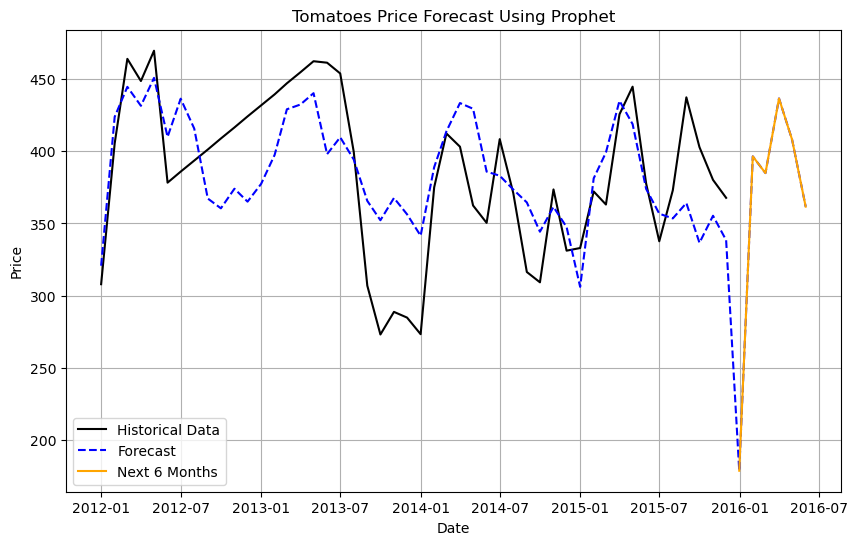

In [88]:
# Plot the forecast with a different color for the future 6 months
import matplotlib.pyplot as plt

# Plot the historical data and forecast
fig = plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Historical Data', color='black', linestyle='-')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue', linestyle='--')

# Highlight the forecasted 6 months
future_forecast = forecast.tail(6)
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Next 6 Months', color='orange', linestyle='-')

# Add labels and legend
plt.title("Tomatoes Price Forecast Using Prophet")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


If we look at the graph above, with the forecasted price being almost always closer to the actual historical prices, we can make a safe bet on the future prediction for the next 6 months as well in this Prophet method.

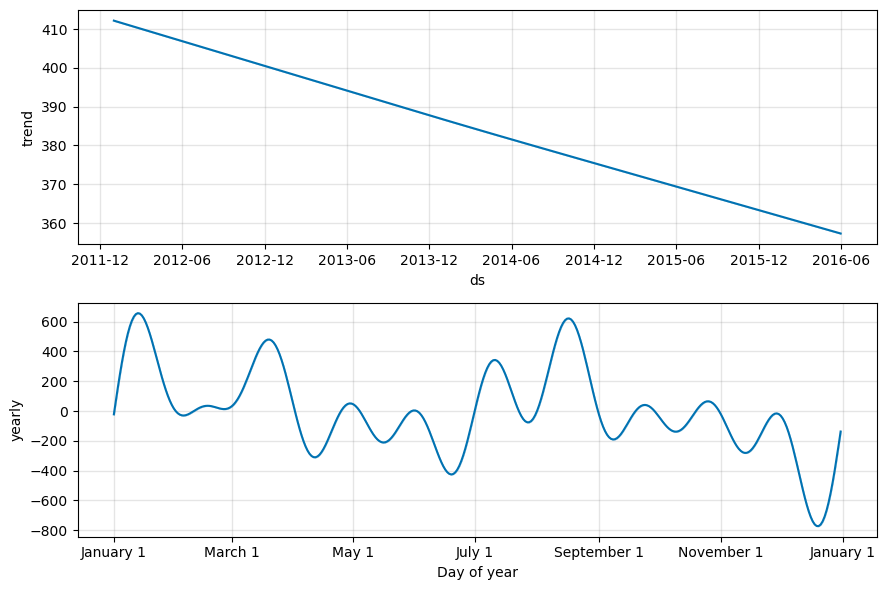

In [89]:
# Plot the components of the forecast
components_fig = model.plot_components(forecast)
plt.show()


In [92]:
# Install nbconvert if not already installed
!pip install nbconvert

# Convert the current notebook to HTML
!jupyter nbconvert --to html "C:\Users\palad\Downloads\OPMFinalWeek\OPMFinalAssignment_NagaChaitanya_Paladugu.ipynb"




[NbConvertApp] Converting notebook C:\Users\palad\Downloads\OPMFinalWeek to html
Traceback (most recent call last):
  File "C:\Users\palad\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\palad\anaconda3\Lib\site-packages\jupyter_core\application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\palad\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\palad\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 412, in start
    self.convert_notebooks()
  File "C:\Users\palad\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 590, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\palad\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 556, in convert_single_notebook
    output, resources = self.export_single_notebook(
    